In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("reduced.csv", delimiter=',')

# Classify timestamps as datetimes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index(df['Timestamp'], inplace=True)

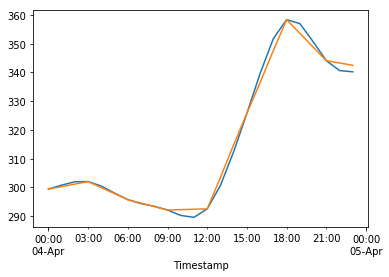

In [5]:
# df.drop(['Sin', 'Cos'], axis=1)

def interpolate_linear(df):
    df['sin'] = np.sin(np.deg2rad(df['Wind Direction']))
    df['cos'] = np.cos(np.deg2rad(df['Wind Direction']))

    df_lin = df.copy()
    df_lin.interpolate(inplace=True)#, limit=3)

    df['Wind Direction Linear'] = np.rad2deg(np.arctan2(df_lin['sin'], df_lin['cos'])).apply(full_range)
    df['Wind Speed Linear'] = df_lin['Wind Speed']

    df = df.drop(['sin', 'cos'], axis=1)
    return df

def interpolate_cubic_spline(df):
    df['sin'] = np.sin(np.deg2rad(df['Wind Direction']))
    df['cos'] = np.cos(np.deg2rad(df['Wind Direction']))

    df_spl = df.copy()
    df_spl.interpolate(method='cubic', order=3, inplace=True)#, limit=3) # cubic == spline?
    df['Wind Direction Spline'] = np.rad2deg(np.arctan2(df_spl['sin'], df_spl['cos'])).apply(full_range)
    df['Wind Speed Spline'] = df_spl['Wind Speed']

    df = df.drop(['sin', 'cos'], axis=1)
    return df

def full_range(f):
    if f < 0:
        return f + 360
    else:
        return f

interpolate_linear(df)
interpolate_cubic_spline(df)
df['2016-04-04']['Wind Direction Spline'].plot()
df['2016-04-04']['Wind Direction Linear'].plot()
df = df.drop(['sin', 'cos'], axis=1)
writer = pd.ExcelWriter('Meteorological Interpolated.xlsx')
df.to_excel(writer,'ledata')
writer.save()